In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

import warnings
warnings.filterwarnings('ignore')

from figure_labeler import *
from IPython.display import HTML
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')

In [2]:
fl = FigureLabeler();
pd.options.mode.chained_assignment = None

<h1 style="text-align:center;">Retail Data Analysis: Unveiling Product Insights</h1>
<hr>

<a name="top"></a>
#### Table of Contents:

[ref0]: #exec_summary
- [Executive Summary][ref0]

[ref1]: #prob_stat
- [Problem Statement][ref1]

[ref2]: #motiv
- [Motivation][ref2]

[ref3]: #dat_sor
- [Data Source][ref3]

[ref4]: #dat_prep
- [Data Preprocessing][ref4]

    [ref9]: #panda_dp
    - [Panda's Data Preprocessing][ref9]

    [ref10]: #sql_dp
    - [SQL's Data Preprocessing][ref10]

[ref5]: #dat_expl
- [Data Exploration][ref5]

    [ref11]: #panda_de
    - [Panda's Data Exploration][ref11]

    [ref12]: #sql_de
    - [SQL's Data Exploration][ref12]

[ref6]: #res_dis
- [Results and Discussions][ref6]

[ref7]: #conc
- [Conclusion and Recommendations][ref7]

[ref8]: #refe
- [References][ref8]

***

<a name="exec_summary"></a>
## Executive Summary
In this section, an executive summary of the dataset extracted from sports retail stores is presented, comprising five tables interconnected by product_id. 
***
The dataset encompasses 3179 rows across brands, finance, info, reviews, and traffic tables, totaling 28 columns. It provides comprehensive insights into various facets of the retail industry, including product brands, financial details, brand information, customer reviews, and website traffic. Notably, Adidas emerges as the dominant brand, with over 2500 counts, followed by Nike with 600 counts. Sales distribution per brand reveals Adidas' significant revenue, while the scatter plot of sales and listing price highlights Adidas' dominance in higher-priced products. Moreover, the top 10 best-selling and most reviewed products predominantly feature Adidas items, underlining the brand's strong market presence and consumer appeal. These findings underscore the dataset's utility in aiding businesses' strategic decision-making and market analysis within the retail sector.

[ref]: #top
[Back to Table of Contents][ref]

<a name="prob_stat"></a>
## Problem Statement
In this section, the problem statement is addressed as data analysts for a global retail company with online and physical stores. Their task is to analyze extensive databases covering sales, product details, customer reviews, website traffic, and financial records.
***
Specifically, we aim to identify the most selling shoe brand across both online and physical stores and compare their sales in terms of revenue and average price. This analysis will provide valuable insights into product performance and consumer preferences, guiding strategic decision-making and marketing efforts for the retail company.

[ref]: #top
[Back to Table of Contents][ref]

<a name="motiv"></a>
## Motivation
In this section, the motivation lies in leveraging data analytics to unearth valuable insights within the expansive databases of a global retail company.
***
Focusing on brands like Nike and Adidas, our aim is to extract meaningful information from sales, product details, customer reviews, website traffic, and financial records. By identifying the most selling shoe brand across both online and physical stores and comparing their sales performance in terms of revenue and average price, we aim to provide actionable insights for optimizing product strategies, enhancing customer experiences, and maximizing profitability. This analysis serves as a cornerstone for informed decision-making and strategic planning within the dynamic retail landscape.

[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_sor"></a>
## Data Source
In this section, the data source utilized for the analysis is outlined: a comprehensive dataset sourced from a global retail company encompassing both online and physical stores.
***

The dataset comprises extensive databases covering various aspects of retail operations, including sales transactions, product details, customer reviews, website traffic metrics, and financial records. It spans multiple tables interconnected by product_id, providing a rich and detailed repository of information. Brands like Nike and Adidas are prominently featured, offering insights into their product performance and consumer engagement. This dataset serves as the foundation for our analysis, enabling us to extract valuable insights to inform strategic decision-making and optimize retail operations.

*Click this for the dataset:* [Dataset Link](https://www.kaggle.com/datasets/angelobejaranociotti/retail-db)

[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_prep"></a>
## Data Preprocessing
In this section, data preprocessing is conducted using both [Pandas](#panda_dp) and [SQL](#sql_dp) to prepare the dataset for analysis.
***
We leverage Pandas, a powerful Python library, to perform operations such as handling missing values, transforming data types, and merging tables. Additionally, we utilize SQL queries to extract, filter, and aggregate data directly from the database. By combining these approaches, we ensure that the dataset is cleansed, structured, and ready for further analysis. This preprocessing step is crucial for ensuring data quality and integrity, ultimately facilitating accurate and insightful analysis of the retail dataset.

<a name="panda_dp"></a>
### Panda's Data Preprocessing

In [3]:
brands = pd.read_csv("brands.csv")
finance = pd.read_csv("finance.csv")
info = pd.read_csv("info.csv")
reviews = pd.read_csv("reviews.csv")
traffic = pd.read_csv("traffic.csv")

In [4]:
merged_df = pd.concat([brands, finance, info, reviews, traffic], axis=1)

columns_to_drop = ['modified_brand', 'modified_listing_price', 'modified_sale_price', 
                   'modified_discount', 'modified_revenue', 'modified_product_name', 
                   'modified_description', 'modified_last_visited', 'Unnamed: 7']
merged_df.drop(columns_to_drop, axis=1, inplace=True)

all_cols = list(merged_df.columns)
duplicate_cols = [col for col in all_cols if all_cols.count(col) > 1]

merged_df.drop(duplicate_cols[1:], axis=1, inplace=True)

In [5]:
fl.table_caption("Shoes Listing Sales Data",
                 "Table displaying the product, brand, and metrics of the product.")
merged_df.head()

,brand,listing_price,sale_price,discount,revenue,product_name,description,rating,reviews,Hour,minute,real_rating,real_reviews,last_visited
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,2018-05-19 15:13:00
1,Adidas,76.0,38.0,0.5,1641.0,Women's adidas Originals Sleek Shoes,"A modern take on adidas sport heritage, tailor...",03:03:00,1900-01-01 00:00:00,3,3,"3,3",24,2018-11-29 16:16:00
2,Adidas,10.0,6.0,0.4,399.0,Women's adidas Swim Puka Slippers,These adidas Puka slippers for women's come wi...,02:06:00,1900-01-01 13:00:00,2,6,"2,6",37,2018-02-01 10:27:00
3,Adidas,70.0,35.0,0.5,2204.0,Women's adidas Sport Inspired Questar Ride Shoes,"Inspired by modern tech runners, these women's...",04:01:00,1900-01-01 11:00:00,4,1,"4,1",35,2018-09-07 20:06:00
4,Adidas,80.0,40.0,0.5,5183.0,Women's adidas Originals Taekwondo Shoes,This design is inspired by vintage Taekwondo s...,03:05:00,1900-01-03 00:00:00,3,5,"3,5",72,2019-07-18 15:26:00


In [6]:
merged_df.shape

(3185, 14)

In [7]:
merged_df.isnull().sum()

brand             65
listing_price     65
sale_price        65
discount          65
revenue           65
product_name      65
description       68
rating            65
reviews           65
Hour               0
minute             0
real_rating       65
real_reviews       0
last_visited     257
dtype: int64

In [8]:
merged_df['listing_price'] = pd.to_numeric(merged_df['listing_price'], errors='coerce')
merged_df['sale_price'] = pd.to_numeric(merged_df['sale_price'], errors='coerce')
merged_df['revenue'] = pd.to_numeric(merged_df['revenue'], errors='coerce')

merged_df['listing_price'].fillna(merged_df['listing_price'].median(), inplace=True)
merged_df['sale_price'].fillna(merged_df['sale_price'].median(), inplace=True)
merged_df['revenue'].fillna(merged_df['revenue'].median(), inplace=True)

In [9]:
merged_df.reset_index(drop=True, inplace=True)

In [10]:
fl.table_caption("Shoes Listing Sales Data",
                 "Table displaying the product, brand, and the numeric metrics of the product.")
merged_df.head()

,brand,listing_price,sale_price,discount,revenue,product_name,description,rating,reviews,Hour,minute,real_rating,real_reviews,last_visited
0,NaN,60.0,46.0,NaN,2735.0,NaN,NaN,NaN,NaN,0,0,NaN,0,2018-05-19 15:13:00
1,Adidas,76.0,38.0,0.5,1641.0,Women's adidas Originals Sleek Shoes,"A modern take on adidas sport heritage, tailor...",03:03:00,1900-01-01 00:00:00,3,3,"3,3",24,2018-11-29 16:16:00
2,Adidas,10.0,6.0,0.4,399.0,Women's adidas Swim Puka Slippers,These adidas Puka slippers for women's come wi...,02:06:00,1900-01-01 13:00:00,2,6,"2,6",37,2018-02-01 10:27:00
3,Adidas,70.0,35.0,0.5,2204.0,Women's adidas Sport Inspired Questar Ride Shoes,"Inspired by modern tech runners, these women's...",04:01:00,1900-01-01 11:00:00,4,1,"4,1",35,2018-09-07 20:06:00
4,Adidas,80.0,40.0,0.5,5183.0,Women's adidas Originals Taekwondo Shoes,This design is inspired by vintage Taekwondo s...,03:05:00,1900-01-03 00:00:00,3,5,"3,5",72,2019-07-18 15:26:00


In [11]:
merged_df.isnull().sum()

brand             65
listing_price      0
sale_price         0
discount          65
revenue            0
product_name      65
description       68
rating            65
reviews           65
Hour               0
minute             0
real_rating       65
real_reviews       0
last_visited     257
dtype: int64

In [12]:
# Dictionary for renaming product names
rename_dict = {
    "Women's adidas Running Ultraboost 19 Shoes": "Adidas Ultraboost 19 (Women)",
    "Men's adidas Originals Supercourt Shoes": "Adidas Supercourt (Men)",
    "Men's adidas Originals Superstar Shoes": "Adidas Superstar (Men)",
    "Women's adidas Running SenseBoost GO Shoes": "Adidas SenseBoost GO (Women)",
    "Men's adidas Originals Continental 80 Shoes": "Adidas Continental 80 (Men)",
    "Men's adidas Originals Stan Smith Shoes": "Adidas Stan Smith (Men)",
    "Nike Air DSVM": "Nike Air DSVM",
    "Men's adidas Sport Inspired Grand Court Shoes": "Adidas Grand Court (Men)",
    "Women's adidas Originals SL Andridge Shoes": "Adidas SL Andridge (Women)",
    "Women's adidas Originals Sleek Shoes": "Adidas Sleek (Women)"
}

# Replace product names using the dictionary
merged_df['product_name'] = merged_df['product_name'].replace(rename_dict)

<a name="sql_dp"></a>
### SQL's Data Preprocessing

In [13]:
database = 'retailDB.sqlite'
database

'retailDB.sqlite'

In [14]:
conn = sqlite3.connect('retailDB.sqlite')

In [15]:
fl.table_caption("Database Content",
                 "Table displaying the content of the database.")

tables = pd.read_sql("SELECT * FROM sqlite_master WHERE type='table'", conn)
tables.head()

,type,name,tbl_name,rootpage,sql
0,table,finance,finance,2,CREATE TABLE finance (\r\n\tproduct_id VARCHAR...
1,table,info,info,24,CREATE TABLE info (\r\n\tproduct_name VARCHAR(...
2,table,brands,brands,338,CREATE TABLE brands (\r\n\tproduct_id VARCHAR(...
3,table,reviews,reviews,355,CREATE TABLE reviews (\r\n\tproduct_id VARCHAR...
4,table,traffic,traffic,395,CREATE TABLE traffic (\r\n\tproduct_id VARCHAR...


In [16]:
fl.table_caption("Finance Content",
                 "Table displaying the content of finance data content.")

finance = pd.read_sql("""SELECT * FROM finance;""",conn)
finance.head()

,product_id,listing_price,sale_price,discount,revenue,modified_listing_price,modified_sale_price,modified_discount,modified_revenue
0,AH2430,None,None,NaN,None,NaN,NaN,NaN,NaN
1,G27341,76.0,38.0,0.5,1641.0,76.0,38.0,0.5,1641.0
2,CM0081,10.0,6.0,0.4,399.0,10.0,6.0,0.4,399.0
3,B44832,70.0,35.0,0.5,2204.0,70.0,35.0,0.5,2204.0
4,D98205,80.0,40.0,0.5,5183.0,80.0,40.0,0.5,5183.0


In [17]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_id              3179 non-null   object 
 1   listing_price           3179 non-null   object 
 2   sale_price              3179 non-null   object 
 3   discount                3120 non-null   float64
 4   revenue                 3179 non-null   object 
 5   modified_listing_price  3120 non-null   float64
 6   modified_sale_price     3120 non-null   float64
 7   modified_discount       3120 non-null   float64
 8   modified_revenue        3120 non-null   float64
dtypes: float64(5), object(4)
memory usage: 223.7+ KB


In [18]:
fl.table_caption("Info Content",
                 "Table displaying the content of info data content.")

info = pd.read_sql("""SELECT * FROM info;""",conn)
info.head()

,product_name,product_id,description,modified_product_name,modified_description
0,None,AH2430,None,None,None
1,Adidas Originals Sleek (Women),G27341,"A modern take on adidas sport heritage, tailor...",Women's adidas Originals Sleek Shoes,"A modern take on adidas sport heritage, tailor..."
2,Women's adidas Swim Puka Slippers,CM0081,These adidas Puka slippers for women's come wi...,Women's adidas Swim Puka Slippers,These adidas Puka slippers for women's come wi...
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,"Inspired by modern tech runners, these women's...",Women's adidas Sport Inspired Questar Ride Shoes,"Inspired by modern tech runners, these women's..."
4,Women's adidas Originals Taekwondo Shoes,D98205,This design is inspired by vintage Taekwondo s...,Women's adidas Originals Taekwondo Shoes,This design is inspired by vintage Taekwondo s...


In [19]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_name           3179 non-null   object
 1   product_id             3179 non-null   object
 2   description            3179 non-null   object
 3   modified_product_name  3120 non-null   object
 4   modified_description   3117 non-null   object
dtypes: object(5)
memory usage: 124.3+ KB


In [20]:
fl.table_caption("Reviews Content",
                 "Table displaying the content of reviews data content.")

reviews = pd.read_sql("""SELECT * FROM reviews;""",conn)
reviews.head()

,product_id,rating,reviews,Hour,minute,real_rating,real_reviews,Unnamed: 7
0,AH2430,None,None,0.0,0.0,None,0.0,
1,G27341,03:03:00,1900-01-01 00:00:00,3.0,3.0,"3,3",24.0,
2,CM0081,02:06:00,1900-01-01 13:00:00,2.0,6.0,"2,6",37.0,
3,B44832,04:01:00,1900-01-01 11:00:00,4.0,1.0,"4,1",35.0,
4,D98205,03:05:00,1900-01-03 00:00:00,3.0,5.0,"3,5",72.0,


In [21]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3185 entries, 0 to 3184
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    3185 non-null   object
 1   rating        3185 non-null   object
 2   reviews       3185 non-null   object
 3   Hour          3185 non-null   object
 4   minute        3185 non-null   object
 5   real_rating   3126 non-null   object
 6   real_reviews  3185 non-null   object
 7   Unnamed: 7    3185 non-null   object
dtypes: object(8)
memory usage: 199.2+ KB


In [22]:
fl.table_caption("Traffic Content",
                 "Table displaying the content of traffic data content.")

traffic = pd.read_sql("""SELECT * FROM traffic;""",conn)
traffic.head()

,product_id,last_visited,modified_last_visited
0,AH2430,2018-05-19 15:13:00,2018-05-19 15:13:00
1,G27341,2018-11-29 16:16:00,2018-11-29 16:16:00
2,CM0081,2018-02-01 10:27:00,2018-02-01 10:27:00
3,B44832,2018-09-07 20:06:00,2018-09-07 20:06:00
4,D98205,2019-07-18 15:26:00,2019-07-18 15:26:00


In [23]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             3179 non-null   object
 1   last_visited           3179 non-null   object
 2   modified_last_visited  2928 non-null   object
dtypes: object(3)
memory usage: 74.6+ KB


In [24]:
# Define the mapping of old product names to new product names
product_name_mapping = {
    "Nike Air VaporMax Flyknit 2 LXX": "Nike Air VaporMax Flyknit 2 LXX",
    "Men's adidas Originals ZX 4000 4D Shoes": "Adidas ZX 4000 4D (Men)",
    "Adidas Running Alphaedge 4D (Unisex)": "Adidas Alphaedge 4D (Unisex)",
    "Nike Mercurial Superfly 7 Elite MDS FG": "Nike Mercurial Superfly 7 Elite MDS FG",
    "Unisex adidas Originals by Alexander Wang Puff Trainer Shoes": "Adidas by Alexander Wang Puff Trainer Shoes",
    "Originals CRAIG GREEN KONTUUR II (Unisex)": "CRAIG GREEN KONTUUR II (Unisex)",
    "Originals CRAIG GREEN KONTUUR I (Unisex)": "CRAIG GREEN KONTUUR I (Unisex)",
    "Nike Mercurial Superfly 7 Elite SE FG": "Nike Mercurial Superfly 7 Elite SE FG",
    "Unisex Football Predator Mutator 20+ Firm Ground Boots": "Football Predator Mutator 20+ Firm Ground (Unisex)",
    "Nike Phantom Vision 2 Elite Dynamic Fit FG": "Nike Phantom Vision 2 Elite Dynamic Fit FG",
    "Air Jordan 10 Retro": "Air Jordan 10 Retro",
    "Men's Originals Salvapor 032c Shoes": "Originals Salvapor 032c (Men)",
    "Nike Zoom Fly": "Nike Zoom Fly",
    "Adidas Running Pharrell Williams Solar HU (Unisex)": "Adidas Pharrell Williams Solar HU (Unisex)",
    "CRAIG GREEN KONTUUR I (Unisex)": "CRAIG GREEN KONTUUR I (Unisex)",
    "Men's adidas Running Universal Works Ultraboost 19 Shoes": "Adidas Universal Works Ultraboost 19 (Men)",
    "Women's adidas by Stella McCartney Running UltraBoost T Shoes": "Adidas by Stella McCartney UltraBoost T (Women)",
    "Women's Running Ultraboost A.RDY Shoes": "Running Ultraboost A.RDY (Women)",
    "Men's adidas Originals White Mountaineering Nite Jogger Shoes": "Adidas White Mountaineering Night Jogger (Men)",
    "Unisex adidas Originals Skateboarding 3MC Shoes": "Adidas Skateboarding 3MC (Unisex)",
    "Men's adidas Sport Inspired VL Court 2.0 Shoes": "Adidas Sport Inspired VL Court 2.0 (Men)",
    "Women's adidas Originals Supercourt Shoes": "Adidas Supercourt Shoes (Women)",
    "Men's adidas Running Duramo 9 Shoes": "Adidas Duramo 9 (Men)",
    "Zoom Freak 1 'Employee of the Month'": "Zoom Freak 1 'Employee of the Month'",
    "Women's adidas by Steall Mccartney Running Ultraboost T.S. Shoes": "Adidas by Stella McCartney Ultraboost T.S (Women)",
    "Women's adidas Training FitBounce Trainers": "Adidas Training FitBounce Trainers (Women)",
    "Women's adidas Sport Inspired Energy Cloud V Shoes": "Adidas Sport Inspired Energy Cloud V (Women)",
    "Women's adidas Running Duramo SL Shoes": "Adidas Duramo SL (Women)",
    "Women's Running Boston Shoes": "Running Boston Shoes (Women)",
    "Women's ADIDAS ORIGINALS NMD_CS2 PK SHOES": "Adidas NMD_CS2 PK (Women)",
    "Women's ADIDAS ORIGINALS COURTVANTAGE VULCANIZED SHOES": "Adidas Courvantage Vulcanized (Women)",
    "WOMEN'S adidas RUNNING supernova SHOES": "Adidas Supernova (Women)",
    "WOMEN'S ADIDAS SPORT INSPIRED ULTIMAMOTION SHOES": "Adidas Sport Inspired Ultimamotion (Women)",
    "Men's adidas Sport Inspired Grand Court Shoes": "Adidas Sport Inspired Grand Court Shoes (Men)",
    "Men's adidas Originals Rivalry Low Shoes" : "Adidas Rivalry Low Shoes (Men)"
}

# Iterate over the product names mapping and update the table accordingly
for old_name, new_name in product_name_mapping.items():
    update_query = """
    UPDATE info
    SET product_name = ?
    WHERE product_name = ?;
    """
    conn.execute(update_query, (new_name, old_name))

# Committing the changes
conn.commit()

[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_expl"></a>
## Data Exploration
In this section, they delve into data exploration using both [Pandas](#panda_de) and [SQL](#sql_de) to gain deeper insights into the retail dataset.
***
With Pandas, a versatile Python library, we conduct exploratory data analysis by visualizing distributions, trends, and relationships among variables. Additionally, we leverage SQL queries to explore the dataset directly from the database, enabling us to uncover patterns and correlations. By employing these complementary approaches, we aim to uncover valuable insights into product performance, customer behavior, and market trends within the retail industry. This data exploration phase serves as a crucial foundation for informing strategic decisions and driving business growth.

<a name="panda_de"></a>
### Panda's Data Exploration

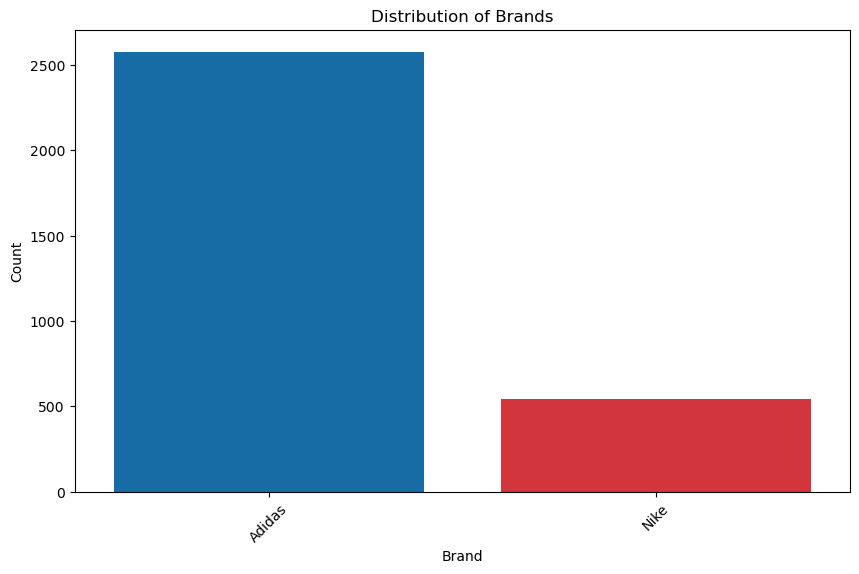

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='brand', palette={'Nike': '#ed1b24', 'Adidas': '#0070bc'})
plt.title('Distribution of Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

fl.fig_caption("Brand Distribution",
               "Bar graph displaying the brand count distribution.")

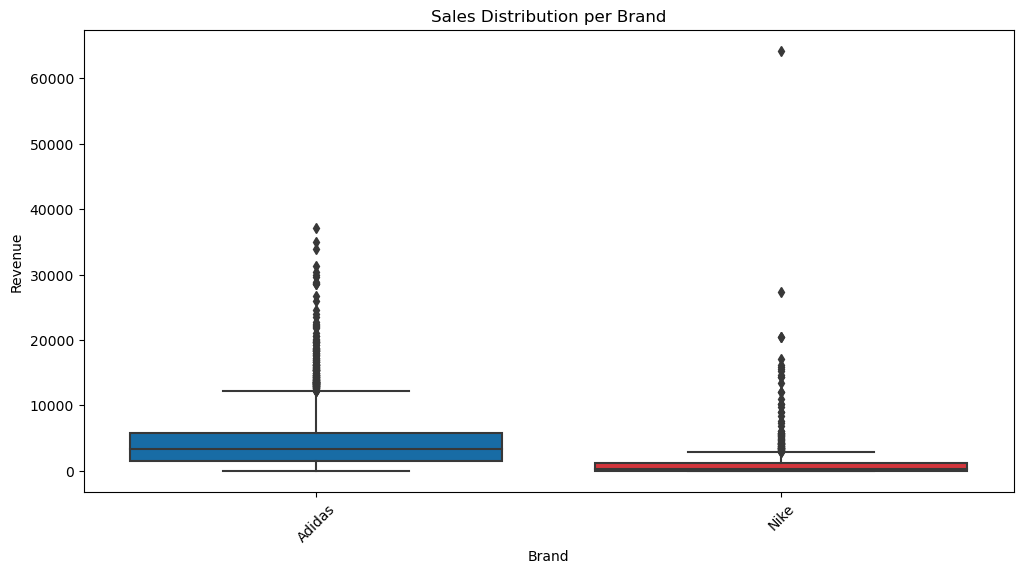

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='revenue', data=merged_df, palette={'Nike': '#ed1b24', 'Adidas': '#0070bc'})
plt.title('Sales Distribution per Brand')
plt.xlabel('Brand')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

fl.fig_caption("Brand Sales Distribution",
               "Graph displaying the sales count distribution per brand.")

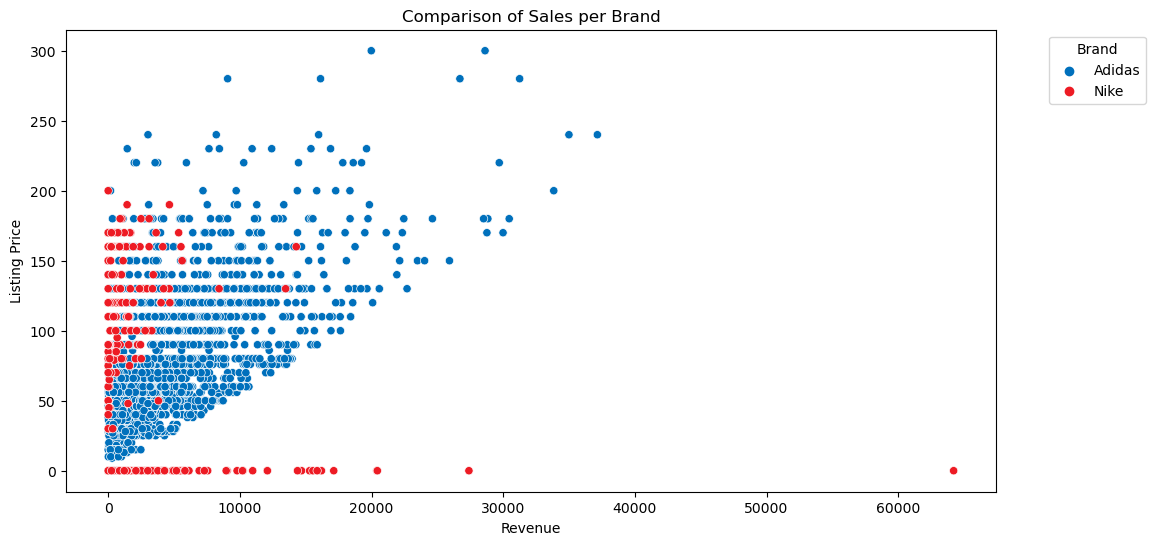

In [27]:
# Comparison of sales in terms of revenue and average price per brand
plt.figure(figsize=(12, 6))
sns.scatterplot(x='revenue', y='listing_price', hue='brand', data=merged_df, palette={'Nike': '#ed1b24', 'Adidas': '#0070bc'})
plt.title('Comparison of Sales per Brand')
plt.xlabel('Revenue')
plt.ylabel('Listing Price')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

fl.fig_caption("Brand Sales Comparison Listing Price",
               "Graph displaying the sales comparison per brand.")

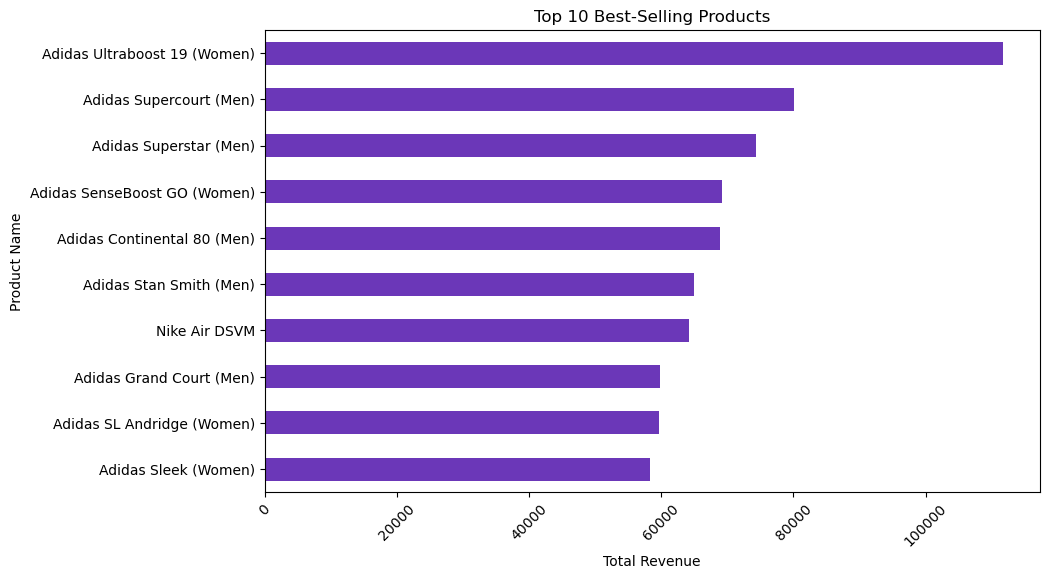

In [28]:
# Top 10 best-selling products
top_10_products = merged_df.groupby('product_name')['revenue'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='barh', color="#6b37b8") 
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Revenue')  
plt.ylabel('Product Name')  
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.show()

fl.fig_caption("List of Top 10 Best Selling Products",
               "Graph displaying the best selling products with total revenue.")

<a name="sql_de"></a>
### SQL's Data Exploration

In [29]:
fl.table_caption("Shoe Product List ",
                 "Table displaying the list of shoe name with average sales price.")

avg_sale_price = pd.read_sql("""
    SELECT i.product_name,
    AVG(f.sale_price) AS avg_sales_price 
    FROM info i 
    JOIN finance f ON i.product_id=f.product_id
    GROUP BY i.product_name
    ORDER BY avg_sales_price DESC
    LIMIT 10;
""", conn)
avg_sale_price

,product_name,avg_sales_price
0,Nike Air VaporMax Flyknit 2 LXX,365.0
1,Adidas Originals ZX 4000 4D (Men),288.0
2,Adidas Alphaedge 4D (Unisex),280.0
3,Nike Mercurial Superfly 7 Elite MDS FG,250.0
4,Nike Mercurial Superfly 7 Elite SE FG,240.0
5,CRAIG GREEN KONTUUR II (Unisex),240.0
6,CRAIG GREEN KONTUUR I (Unisex),240.0
7,Adidas by Alexander Wang Puff Trainer Shoes,240.0
8,Nike Phantom Vision 2 Elite Dynamic Fit FG,230.0
9,Nike Mercurial Vapor 13 Elite Neymar Jr. FG,230.0


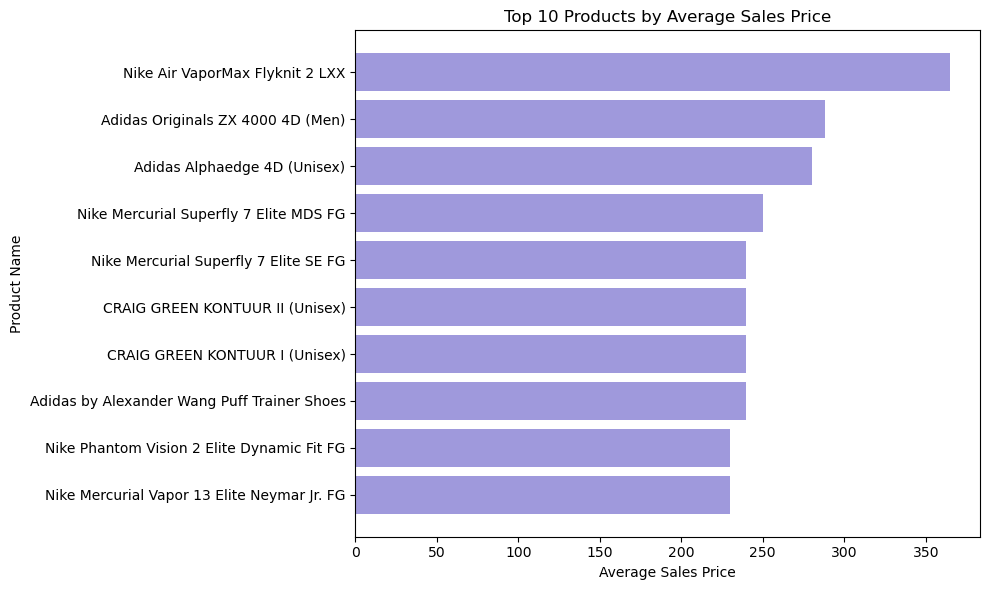

In [30]:
plt.figure(figsize=(10, 6))
plt.barh(avg_sale_price['product_name'], avg_sale_price['avg_sales_price'], color='#9f99dc')
plt.ylabel('Product Name')
plt.xlabel('Average Sales Price')
plt.title('Top 10 Products by Average Sales Price')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

fl.fig_caption("List of Top 10 Selling Products by Average Sales Price",
               "Graph displaying the top 10 selling products by average sales price.")

In [31]:
fl.table_caption("Shoe Product List ",
                 "Table displaying the list of shoe name with average revenue.")

avg_revenue = pd.read_sql("""
    SELECT i.product_name,
    AVG(f.revenue) AS avg_revenue 
    FROM info i 
    JOIN finance f ON i.product_id=f.product_id
    GROUP BY i.product_name
    ORDER BY avg_revenue DESC
    LIMIT 10;
""", conn)
avg_revenue

,product_name,avg_revenue
0,Air Jordan 10 Retro,64204.0
1,Originals Salvapor 032c (Men),28762.0
2,Nike Zoom Fly,27396.0
3,Adidas Alphaedge 4D (Unisex),26711.0
4,Adidas Pharrell Williams Solar HU (Unisex),25918.0
5,CRAIG GREEN KONTUUR I (Unisex),25487.0
6,Adidas Universal Works Ultraboost 19 (Men),24838.5
7,Adidas by Stella McCartney UltraBoost T (Women),24623.0
8,Running Ultraboost A.RDY (Women),22337.0
9,Adidas White Mountaineering Night Jogger (Men),22139.0


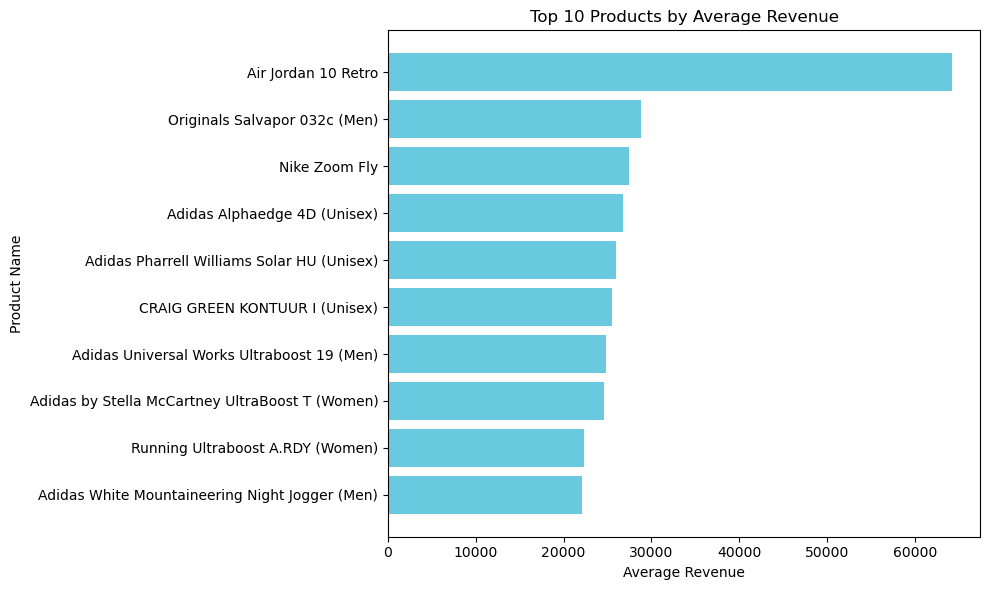

In [32]:
plt.figure(figsize=(10, 6))
plt.barh(avg_revenue['product_name'], avg_revenue['avg_revenue'], color='#69c9df')
plt.ylabel('Product Name')
plt.xlabel('Average Revenue')
plt.title('Top 10 Products by Average Revenue')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

fl.fig_caption("List of Top 10 Selling Products by Average Revenue",
               "Graph displaying the top 10 selling products by revenue.")

In [33]:
fl.table_caption("Shoe Product List ",
                 "Table displaying the list of shoe name with product count.")

most_products_purchased = pd.read_sql("""
    SELECT i.product_name, 
    COUNT(product_id) AS count_of_products 
    FROM info i
    GROUP BY i.product_name
    ORDER BY count_of_products DESC
    LIMIT 10;
""", conn)
most_products_purchased

,product_name,count_of_products
0,None,59
1,Adidas Originals Supercourt (Men),16
2,Adidas Originals Stan Smith (Men),15
3,Adidas Originals Sambarose (Women),15
4,Nike Air Max 90,14
5,Adidas Originals Continental 80 (Men),14
6,Adidas Originals Sleek (Women),13
7,Adidas Originals Marathon Tech (Unisex),13
8,Adidas Originals NMD_R1 (Women),12
9,Adidas Sport Inspired VL Court 2.0 (Men),11


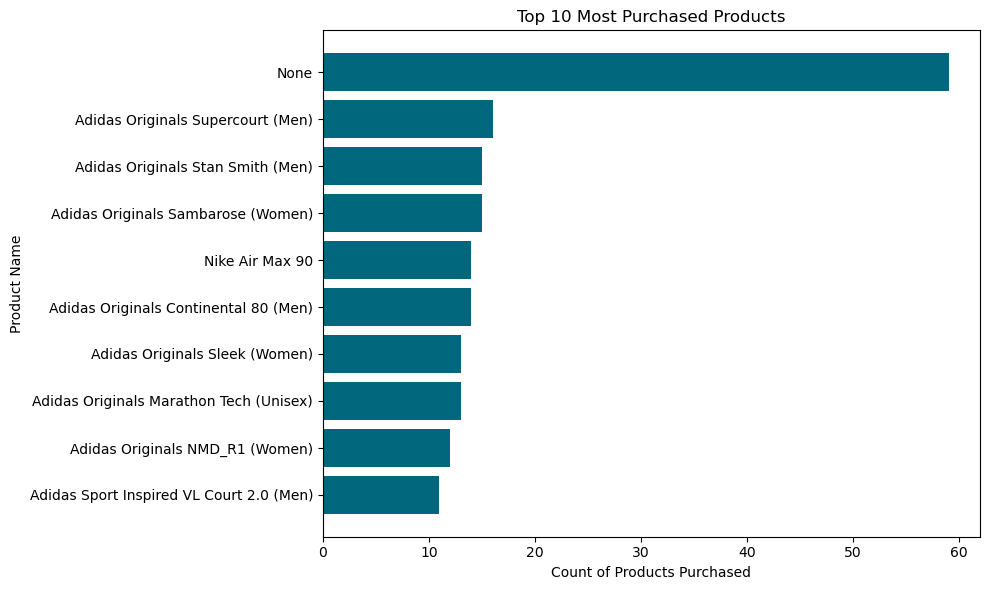

In [34]:
plt.figure(figsize=(10, 6))
plt.barh(most_products_purchased['product_name'], most_products_purchased['count_of_products'], color='#00677c')
plt.ylabel('Product Name')
plt.xlabel('Count of Products Purchased')
plt.title('Top 10 Most Purchased Products')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

fl.fig_caption("List of Top 10 Most Purchased Products",
               "Graph displaying the top 10 most purchased product count.")

In [35]:
fl.table_caption("Shoe Product List ",
                 "Table displaying the list of shoe name with month of the year and its count visit.")

most_last_visited_product_in_months = pd.read_sql("""
    SELECT i.product_name,
    COUNT(DISTINCT SUBSTR(t.modified_last_visited,6,2)) AS year_month,
    COUNT(*) AS visit_count
    FROM traffic t
    JOIN info i ON t.product_id = i.product_id
    GROUP BY i.product_name
    ORDER BY visit_count DESC
    LIMIT 10;
""", conn)
most_last_visited_product_in_months

,product_name,year_month,visit_count
0,None,12,59
1,Adidas Originals Supercourt (Men),9,16
2,Adidas Originals Stan Smith (Men),8,15
3,Adidas Originals Sambarose (Women),5,15
4,Nike Air Max 90,9,14
5,Adidas Originals Continental 80 (Men),9,14
6,Adidas Originals Sleek (Women),6,13
7,Adidas Originals Marathon Tech (Unisex),7,13
8,Adidas Originals NMD_R1 (Women),6,12
9,Adidas Sport Inspired VL Court 2.0 (Men),6,11


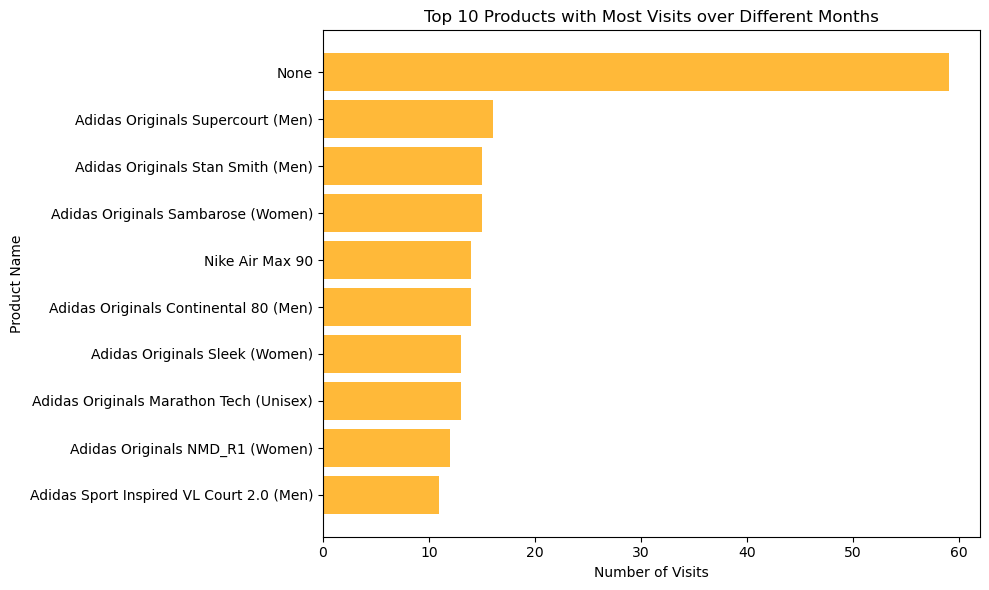

In [36]:
fl.fig_caption("List of Top 10 Products with Most Visits over the Months",
               "Graph displaying the top 10 most visit product over different months.")

plt.figure(figsize=(10, 6))
plt.barh(most_last_visited_product_in_months['product_name'], most_last_visited_product_in_months['visit_count'], color='#ffb939')
plt.ylabel('Product Name')
plt.xlabel('Number of Visits')
plt.title('Top 10 Products with Most Visits over Different Months')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

[ref]: #top
[Back to Table of Contents][ref]

<a name="res_dis"></a>
## Results and Discussions
In this section, the results of the analysis are presented, and discussion on the findings is initiated.
***
By identifying the top 10 best-selling products across online and physical stores, we reveal key insights into consumer preferences and product performance within the retail company. Furthermore, comparing sales performance in terms of revenue and average price provides valuable insights into product profitability and market positioning. Through in-depth discussion, we analyze trends, patterns, and potential implications of the results, shedding light on opportunities for strategic decision-making and business growth. This discussion aims to provide actionable insights and recommendations based on the analysis of the retail dataset.

**Distribution of brands:** 
In the pandas’ data exploration, the distribution of brands is visualized using a bar chart. The x-axis represents the different brands, specifically Adidas and Nike in this case. Meanwhile, the y-axis indicates the count of occurrences for each brand, ranging from 0 to 2500. The bar for Adidas extends beyond 2500 counts, suggesting a significant presence or frequency of Adidas products within the dataset. On the other hand, the bar for Nike stops at 600 counts, indicating a comparatively lower frequency or representation of Nike products. This visualization highlights the prevalence of Adidas products relative to Nike within the dataset, providing valuable insights into brand distribution and popularity in the sports retail domain.

**Sales Distribution per brand:**
The box plot illustrates the sales distribution per brand, focusing on Adidas and Nike. The x-axis represents the brands, while the y-axis indicates the revenue generated, ranging from 0 to 60000. For Adidas, the box plot shows a whisker extending from 0 to 15000, with the lower quartile around 3000 and the upper quartile approximately at 7000. The median revenue, depicted by the line within the box, is around 5000. This suggests that Adidas products have a wide range of revenue, with a substantial number of sales falling within the interquartile range. In contrast, the box plot for Nike reveals a narrower distribution, with the whisker spanning from 0 to 5000. The lower quartile, upper quartile, and median revenue values for Nike are notably lower compared to Adidas, indicating a narrower range of sales and potentially lower revenue generation for Nike products. Overall, the box plot provides insights into the revenue distribution for Adidas and Nike, highlighting differences in sales performance between the two brands within the sports retail dataset.

**Comparison of Sales per Brand:**
The scatter plot titled "Comparison of Sales per Brand" visualizes the relationship between revenue (sales income) and listing price for products associated with Adidas and Nike. The x-axis represents the revenue generated by each product, ranging from 0 to 60000, while the y-axis indicates the listing price of the products, ranging from 0 to 300.

*For Adidas*, the plot demonstrates an increasing trend in revenue, indicating that Adidas products tend to generate higher sales income. Specifically, the revenue increases from 0 to approximately 38000, suggesting a range of successful sales for Adidas products. Regarding listing price, there is a concentration of plots between 0 and 100, indicating that many Adidas products are priced within this range. However, the plot extends up to 300, suggesting variability in listing prices, with some products priced higher.

On the other hand, the scatter plot for *Nike* depicts a similar increasing trend in revenue, but with a narrower range compared to Adidas, spanning from 0 to 27000. Despite this narrower range, Nike products also exhibit variability in listing prices, as indicated by the plot extending to 200. However, there appears to be a higher concentration of plots at a listing price of 0, potentially indicating discounted or lower-priced Nike products.

Overall, the scatter plot highlights the relationship between revenue and listing price for Adidas and Nike products, showcasing their sales performance and pricing strategies within the sports retail dataset.

**Top 10 Best-Selling Products:**
The bar graph presents the top 10 best-selling products, with the y-axis representing the product names and the x-axis indicating the total revenue generated by each product, ranging from 0 to 100000. Among the listed products, "Adidas Ultraboost 19 (Women)" emerges as the highest-selling product, generating over 100000 in revenue, indicating its strong performance in sales. Following closely are "Adidas Supercourt (Men)" and "Adidas Superstar (Men)" with revenues of 80000 and 77000, respectively, showcasing the popularity of these Adidas products among male consumers. Other Adidas products such as "Adidas SenseBoost GO (Women)," "Adidas Continental 80 (Men)," and "Adidas Stan Smith (Men)" also boast substantial revenues ranging from 65000 to 70000. Additionally, "Nike Air DVSM" stands out as the only Nike product in the top 10, generating 65000 in revenue, reflecting its competitive position in the market alongside Adidas. Overall, the bar graph provides valuable insights into the best-selling products within the sports retail dataset, highlighting the dominance of Adidas products and the competitive performance of Nike's offerings.

**Top 10 Products by Average Sales Price:**
The bar graph depicts the top 10 products ranked by their average sales price, with the y-axis representing the product names and the x-axis indicating the average sales price, ranging from 0 to 350. At the top of the list is the "Nike Air VaporMax Flyknit 2 LXX," boasting the highest average sales price of 365.0, indicating its premium status among the listed products. Following closely are several Adidas and Nike products, such as the "Adidas Originals ZX 4000 4D (Men)" and the "Adidas Alphaedge 4D (Unisex)," with average sales prices ranging from 230.0 to 288.0. Notably, Nike products like the "Nike Mercurial Superfly 7 Elite MDS FG" and the "Nike Mercurial Superfly 7 Elite SE FG" also feature prominently in the top 10, reflecting their premium pricing and high-quality design. Overall, the bar graph provides insights into the pricing hierarchy of these top-selling products within the sports retail dataset, with some commanding premium prices while others offer more affordable options.

**Top 10 Products by Average Revenue:**
The bar graph displays the top 10 products ranked by their average revenue, with the y-axis representing the product names and the x-axis indicating the average revenue, ranging from 0 to 60000. At the pinnacle of the list is the "Air Jordan 10 Retro," commanding the highest average revenue of 64204.0, indicating its exceptional performance in generating sales income. Following closely are various Adidas and Nike products, such as the "Originals Salvapor 032c (Men)" and the "Nike Zoom Fly," with average revenues ranging from 22139.0 to 28762.0. Notably, Adidas products like the "Adidas Alphaedge 4D (Unisex)" and the "Adidas Pharrell Williams Solar HU (Unisex)" also feature prominently in the top 10, reflecting their significant revenue-generating potential. Overall, the bar graph provides valuable insights into the revenue hierarchy of these top-selling products within the sports retail dataset, with some products proving to be highly lucrative in terms of average revenue.

**Top 10 Most Purchased Products:**
The bar graph illustrates the top 10 most purchased products, with the y-axis representing the product names and the x-axis indicating the count of products purchased, ranging from 0 to 60. At the top of the list is a product labeled "None," indicating an unspecified product category, with a significant count of 59 purchases. Following closely are various Adidas and Nike products, such as the "Adidas Originals Supercourt (Men)" and the "Adidas Originals Stan Smith (Men)," each with 16 and 15 purchases, respectively. Other Adidas products like the "Adidas Originals Sambarose (Women)" and the "Adidas Originals Continental 80 (Men)" also feature prominently in the top 10, reflecting their popularity among consumers. Additionally, a Nike product, the "Nike Air Max 90," is among the top 10 most purchased items, with 14 purchases. Overall, the bar graph provides valuable insights into the popularity and consumer demand for these products within the sports retail dataset, informing inventory management and marketing strategies.

**Top 10 Products with the Most Visits Over Different Months:** 
The bar graph illustrates the top 10 products with the most visits over different months, with the y-axis representing the product names and the x-axis indicating the number of visits, ranging from 0 to 60. At the forefront of the list is a product categorized as "None," which presumably represents an unspecified product category and garnered the highest visit count of 59. Following closely are various Adidas and Nike products, such as the "Adidas Originals Supercourt (Men)" and the "Adidas Originals Stan Smith (Men)," each with 16 and 15 visits, respectively, highlighting their popularity among visitors. Other Adidas products like the "Adidas Originals Sambarose (Women)" and the "Adidas Originals Continental 80 (Men)" also feature prominently in the top 10, with visit counts ranging from 12 to 15. Overall, the bar graph provides valuable insights into the popularity and consumer engagement levels for these products within the sports retail dataset, guiding businesses in optimizing their marketing stventory management.

[ref]: #top
[Back to Table of Contents][ref]

<a name="conc"></a>
## Conclusion and Recommendations
In this section, conclusions and recommendations derived from the analysis, results, and discussion will be presented.
***

In conclusion, this analysis of the sports retail dataset revealed valuable insights into consumer preferences, brand popularity, and product performance. While both Adidas and Nike were present, Adidas emerged as the dominant brand across several metrics, including top-selling products, revenue generation, and purchase frequency. This dominance can be partially attributed to the uneven distribution of brands within the dataset, with Adidas products significantly outnumbering Nike products.  To gain a more balanced perspective, future analyses should incorporate datasets with a fairer representation of various brands.  However, the analysis also identified other factors potentially contributing to Adidas' success, such as potentially wider product variety, competitive pricing strategies, or successful marketing campaigns. Further investigation into these aspects would provide a more comprehensive understanding of brand preference and product performance within the sports retail landscape.

[ref]: #top
[Back to Table of Contents][ref]

<a name="refe"></a>
## References
***

*Ciotti, A. B. (2023, June 20). Retail store Database. Kaggle. https://www.kaggle.com/datasets/angelobejaranociotti/retail-db*

[ref]: #top
[Back to Table of Contents][ref]

***
***